In [1]:
import matplotlib
from matplotlib.patches import Rectangle
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'text.latex.preamble': '\\usepackage[dvips]{graphicx}\\usepackage{xfrac}\\usepackage{amssymb}\\usepackage{lmodern}'
})
import pandas as pd
import numpy as np

# Example DataFrame format:
# df = pd.DataFrame({
#     'Model': ['A', 'A', 'B', 'B', ...],
#     'Regularisation': [0.01, 0.1, 0.01, 0.1, ...],
#     'Score': [...]
# })

df = pd.read_csv('CSVs/FinalExperiment/model_scores.csv')
df.head()

,Model,Regularisation,Round,Score
0,Genetic,0.0,0,0.001
1,Genetic,0.0,1,0.002
2,Genetic,0.0,2,0.001
3,Genetic,0.0,3,0.001
4,Genetic,0.0,4,0.001


### Plot of Scores with Respect to Temperature of each model etc.

0 Genetic Axes(0.125,0.11;0.775x0.77) Regularisation
     Model  Regularisation  Round  Score
0  Genetic             0.0      0  0.001
1  Genetic             0.0      1  0.002
2  Genetic             0.0      2  0.001
3  Genetic             0.0      3  0.001
4  Genetic             0.0      4  0.001
1 Genetic2 Axes(0.125,0.11;0.775x0.77) Regularisation
         Model  Regularisation  Round  Score
2500  Genetic2             0.0      0  0.001
2501  Genetic2             0.0      1  0.001
2502  Genetic2             0.0      2  0.001
2503  Genetic2             0.0      3  0.001
2504  Genetic2             0.0      4  0.001
2 1stOrderMarkov Axes(0.125,0.11;0.775x0.77) Regularisation
              Model  Regularisation  Round     Score
500  1stOrderMarkov             0.0      0  0.807846
501  1stOrderMarkov             0.0      1  0.777111
502  1stOrderMarkov             0.0      2  0.843940
503  1stOrderMarkov             0.0      3  0.832846
504  1stOrderMarkov             0.0      4  0.823299

/tmp/ipykernel_29274/3053074497.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)
/tmp/ipykernel_29274/3053074497.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)
/tmp/ipykernel_29274/3053074497.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)


3 2ndOrderMarkov Axes(0.125,0.11;0.775x0.77) Regularisation
               Model  Regularisation  Round     Score
1000  2ndOrderMarkov             0.0      0  0.679111
1001  2ndOrderMarkov             0.0      1  0.684205
1002  2ndOrderMarkov             0.0      2  0.633470
1003  2ndOrderMarkov             0.0      3  0.650923
1004  2ndOrderMarkov             0.0      4  0.641111
4 GANModel Axes(0.125,0.11;0.775x0.77) Temperature
         Model  Regularisation  Round     Score
1500  GANModel             0.5      0  0.960641
1501  GANModel             0.5      1  0.958641
1502  GANModel             0.5      2  0.971094
1503  GANModel             0.5      3  0.947547
1504  GANModel             0.5      4  0.971188
5 TransformerModel Axes(0.125,0.11;0.775x0.77) Temperature
                 Model  Regularisation  Round     Score
2000  TransformerModel             0.5      0  0.670829
2001  TransformerModel             0.5      1  0.683282
2002  TransformerModel             0.5      2  0.6

/tmp/ipykernel_29274/3053074497.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)
/tmp/ipykernel_29274/3053074497.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)
/tmp/ipykernel_29274/3053074497.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)


6 LlamaModel Axes(0.125,0.11;0.775x0.77) Temperature
           Model  Regularisation  Round     Score
3000  LlamaModel             1.0      0  0.814017


/tmp/ipykernel_29274/3053074497.py:68: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)


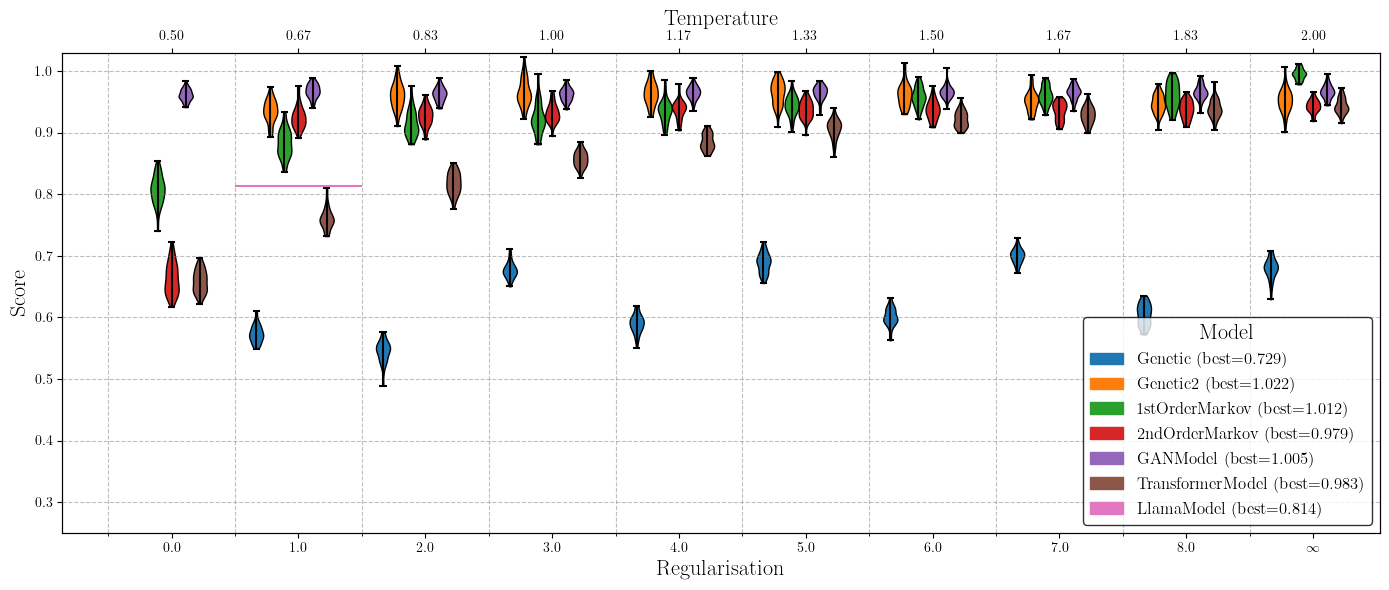

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

heads = ['Genetic', 'Genetic2', 'Markov', 'Markov2', 'GAN', 'Transformer', 'Llama']
csv_files = [f'{mod}GeneratedHeaders.csv' for mod in heads] + ['RealScapyHeaders.csv']
models = ['Genetic', 'Genetic2', '1stOrderMarkov', '2ndOrderMarkov', 'GANModel', 'TransformerModel', 'LlamaModel']
nm = len(models)

# Assign colors to models
color_map = [c for c in plt.rcParams['axes.prop_cycle'].by_key()['color'] if c.lower() != 'black']
model_colors = {model: color_map[i] for i, model in enumerate(models)}

# Width and spacing
box_width = 1/(nm+2)
total_width = box_width * nm

# Build plot
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twiny()
axes = [ax1] * 4 + [ax2]*3
reg_types = ['Regularisation']*4 + ['Temperature']*3

legend_handles = {}

for j, model, ax, reg_name in zip(range(nm), models, axes, reg_types):
    try:
        print(j,model,ax,reg_name)
        mdf = df[(df['Model'] == model)]
        print(mdf.head())
        regs = sorted(mdf['Regularisation'].unique())
        x_ticks = []

        if len(regs) > 1:

            for i, reg in enumerate(regs):
                x_base = i  # x-position for this regularisation
                x_ticks.append(x_base)
                
                scores = mdf[(mdf['Regularisation'] == reg)]['Score']
                
                # Shift each model's box to the side
                x_pos = x_base + (j - len(models)/2) * box_width + box_width/2
                '''
                ax.boxplot(scores, positions=[x_pos], widths=box_width, patch_artist=True,
                        boxprops=dict(facecolor=model_colors[model], color='black'),
                        medianprops=dict(color='black'),
                        whiskerprops=dict(color='black'),
                        capprops=dict(color='black'),
                        flierprops=dict(marker='o', color='black', alpha=0.5),
                        notch=True)'''
                parts = ax.violinplot(scores, positions=[x_pos], widths=box_width)
                # Style it
                for pc in parts['bodies']:
                    pc.set_facecolor(model_colors[model])
                    pc.set_edgecolor('black')
                    pc.set_alpha(1)
                parts['cbars'].set_color('black')
                parts['cmins'].set_color('black')
                parts['cmaxes'].set_color('black')

                # Add a legend proxy manually
                bs = mdf['Score'].max()
                violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)
                if model not in legend_handles.keys():
                    legend_handles[model] = violin_patch
        else:
            bs = mdf['Score'].max()
            violin_patch = mpatches.Patch(color=model_colors[model], label=f'{model} (best={bs:.3f})', edgecolor='black', linewidth=1)
            if model not in legend_handles.keys():
                legend_handles[model] = violin_patch
            plt.hlines([bs],[0.5],[1.5],colors=[model_colors[model]])

        if model != 'LlamaModel':
            ax.set_xticks(x_ticks)
            if reg_name == 'Regularisation':
                ax.set_xticklabels([str(r) for r in regs][:-1] + ['$\infty$'])
            else:
                ax.set_xticklabels([str(f'{r:.2f}') for r in regs])
            ax.set_xlabel(reg_name, size=16)
    except Exception as e:
        print('\n-->', e, model, 'not found')



ax1.set_ylabel('Score', size=16)
#ax1.set_title('Distribution of Scores by Regularisation Type and Model', size=20)

# Custom legend
#handles = [plt.Line2D([0], [0], color=model_colors[m], marker='s', linestyle='', label=m) for m in models]
ax1.legend(handles=list(legend_handles.values()), title='Model',  loc='lower right', fontsize=12, title_fontsize=16,
    frameon=True,
    edgecolor='black')
# Align both axes
ax2.set_xlim(ax1.get_xlim())  # match position scale
plt.ylim(0.25,1.03)



# Minor ticks between majors
ax1.set_xticks(np.arange(-0.5, 9.5, 1), minor=True)

# Grid on minor ticks only (vertical)
ax1.grid(True, which='minor', axis='x', linestyle='--', color='gray', alpha=0.5)

# Grid on major y-ticks
ax1.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.5)

plt.tight_layout()
plt.savefig("Plots/FinalExperiment/RegModelBoxPlots.pdf")
plt.show()

### Plot of generated lengths

Diversity Score 776 / 1000
Example ['ByteField', 'XIntField', 'ByteField', 'XShortField', 'ByteField', 'BitField', 'ByteField', 'ByteField', 'XIntField', 'XIntField', 'BitField', 'XIntField', 'XIntField', 'XIntField', 'XIntField']
Diversity Score 913 / 1000
Example ['UUIDField', 'ShortEnumField', 'UUIDField', 'UUIDField', 'UUIDField']
Diversity Score 987 / 1000
Example ['StrFixedLenField', 'XNBytesField', 'LenField', 'StrField', 'XStrLenField', 'StrFixedLenField']
Diversity Score 962 / 1000
Example ['ByteEnumField', 'ByteEnumField', 'FlagsField', 'XShortField', 'UUIDField', 'XStrLenField', 'FieldListField', 'Field', 'EnumField', 'IntEnumField', 'SignedIntField', 'PadField', 'ShortField', 'FieldLenField', 'BitEnumField', 'SockAddrsField', 'FieldListField', 'BitField', 'BitField', 'XStrLenField', 'FieldListField', 'XShortField', 'XStrLenField', 'EnumField', 'BitField', 'EnumField', 'LenField', 'XBitField', 'ShortEnumField', 'UUIDField', 'PadField', 'XBitField', 'XBitField', 'EnumField', 

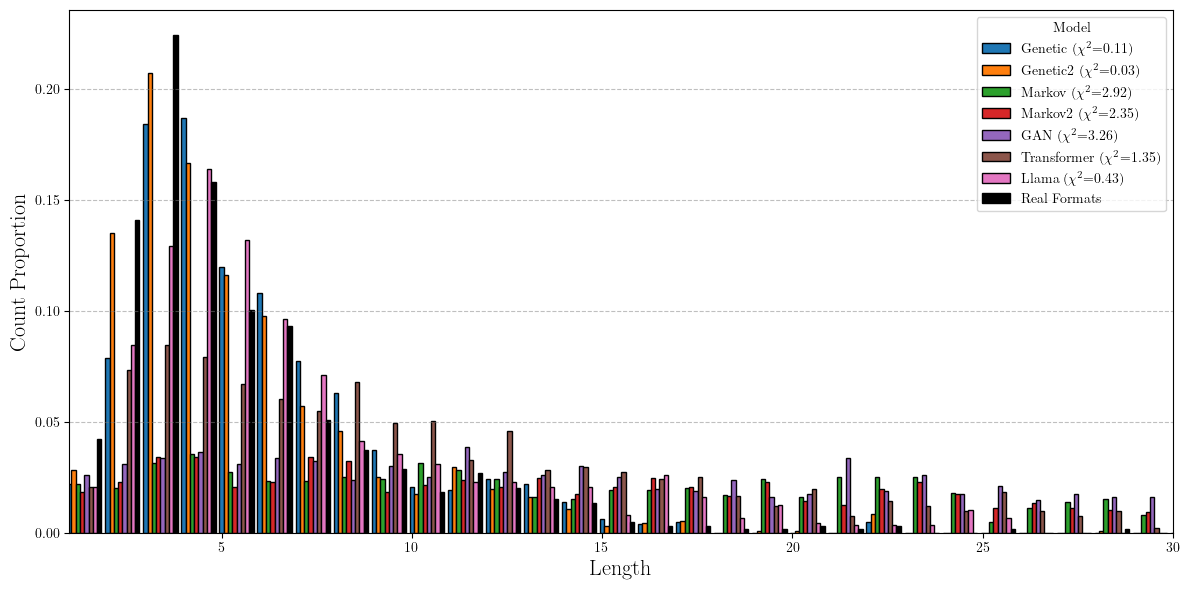

In [3]:
from PY.Plotting import FieldSequencesPlotter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare

plt.figure(figsize=(12, 6))
w = 0.9 / len(csv_files)

# Store length distributions
length_dists = {}
all_lengths = set()

# Collect distributions for each model
for mod, csv_file in zip(heads + ['Real Headers'], csv_files):
    R = FieldSequencesPlotter(csv_file, val_set=0)
    R.self_statistics()
    length_dists[mod] = R.len_c_dict
    all_lengths.update(R.len_c_dict.keys())

# Normalize and align distributions
all_lengths = sorted(all_lengths)
length_matrix = {}

for mod in length_dists:
    dist = np.array([length_dists[mod].get(l, 0) for l in all_lengths], dtype=float)
    if dist.sum() > 0:
        dist /= dist.sum()
    length_matrix[mod] = dist

# Compute chi-square stats
chi_stats = {}
ref_dist = length_matrix['Real Headers']
for mod in heads:
    observed = length_matrix[mod]
    expected = ref_dist * observed.sum()

    # Filter out bins with zero expected value
    mask = expected > 0
    observed = observed[mask]
    expected = ref_dist * observed.sum()
    expected = expected[mask]

    chi2, _ = chisquare(f_obs=observed, f_exp=expected)
    chi_stats[mod] = chi2

# Plot bars
for i, mod in enumerate(heads + ['Real Headers']):
    ys = length_matrix[mod]
    xs = np.array(all_lengths) + i * w
    if mod != 'Real Headers':
        plt.bar(xs, ys, alpha=1, label=f"{mod} ($\chi^2$={chi_stats[mod]:.2f})", edgecolor='black', width=w)
    else:
        plt.bar(xs, ys, alpha=1, label='Real Formats', edgecolor='black', color='black', width=w)

plt.xlabel("Length", size=16)
plt.ylabel("Count Proportion", size=16)
#plt.title("Unique Field Sequence Length Distribution by Model", size=20)
plt.legend(title="Model")
plt.xlim((1, 30))
plt.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.5)
plt.tight_layout()
plt.savefig("Plots/FinalExperiment/FieldSeqLengthByModel.pdf")
plt.show()

### Entropies plot

Diversity Score 776 / 1000
Example ['ByteField', 'XIntField', 'ByteField', 'XShortField', 'ByteField', 'BitField', 'ByteField', 'ByteField', 'XIntField', 'XIntField', 'BitField', 'XIntField', 'XIntField', 'XIntField', 'XIntField']
Diversity Score 913 / 1000
Example ['UUIDField', 'ShortEnumField', 'UUIDField', 'UUIDField', 'UUIDField']


/tmp/ipykernel_29274/2982835791.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  edf = pd.concat([edf, new_df], ignore_index=True)


Diversity Score 987 / 1000
Example ['StrFixedLenField', 'XNBytesField', 'LenField', 'StrField', 'XStrLenField', 'StrFixedLenField']
Diversity Score 962 / 1000
Example ['ByteEnumField', 'ByteEnumField', 'FlagsField', 'XShortField', 'UUIDField', 'XStrLenField', 'FieldListField', 'Field', 'EnumField', 'IntEnumField', 'SignedIntField', 'PadField', 'ShortField', 'FieldLenField', 'BitEnumField', 'SockAddrsField', 'FieldListField', 'BitField', 'BitField', 'XStrLenField', 'FieldListField', 'XShortField', 'XStrLenField', 'EnumField', 'BitField', 'EnumField', 'LenField', 'XBitField', 'ShortEnumField', 'UUIDField', 'PadField', 'XBitField', 'XBitField', 'EnumField', 'BitField', 'XBitField', 'StrFixedLenField', 'SockAddrsField', 'FieldLenField', 'Field', 'BitEnumField', 'ByteField', 'BitField', 'SockAddrsField', 'SignedIntField', 'XIntField', 'ByteField', 'XNBytesField', 'BitField', 'FlagsField', 'PadField', 'FieldListField', 'ByteEnumField', 'FieldLenField']
Diversity Score 956 / 1000
Example ['In

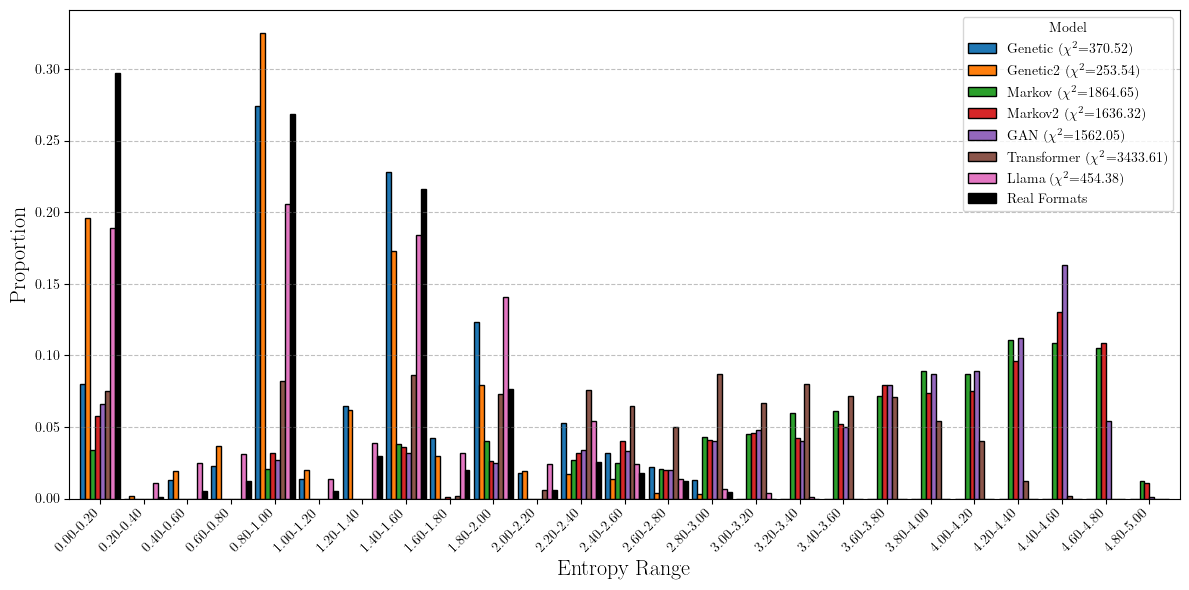

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare

# Get default colors
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_colors = default_colors[:7] + ['black']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Load CSV
edf = pd.DataFrame(columns=['Model','Entropy','Length'])

# Fill df with all headers
for i, (mod, csv_file) in enumerate(zip(heads + ['Real Headers'],  csv_files + ['RealScapyHeaders.csv'])):
    R = FieldSequencesPlotter(csv_file, val_set=0)
    R.self_statistics()
    ents = R.entropies
    new_df = pd.DataFrame([[mod, e, 0] for e in ents], columns=['Model','Entropy','Length'])
    edf = pd.concat([edf, new_df], ignore_index=True)

# Bin entropy values
bin_width = 0.2
edf['EntropyBin'] = (edf['Entropy'] // bin_width) * bin_width

# Get counts
binned_counts = edf.groupby(['EntropyBin', 'Model']).size().unstack(fill_value=0)
binned_counts = binned_counts.sort_index()
binned_props = binned_counts / binned_counts.sum()

# Reference distribution: Real Headers
real_dist = binned_counts['Real Headers']
real_dist = real_dist / real_dist.sum()

# Chi-square stats
chi_stats = {}
for model in binned_counts.columns:
    if model != 'Real Headers':
        
        observed = binned_counts[model]
        expected = real_dist * observed.sum()

        # Filter out bins with zero expected value
        mask = expected > 0
        observed = observed[mask]
        expected = real_dist * observed.sum()
        expected = expected[mask]
        
        chi2, _ = chisquare(f_obs=observed, f_exp=expected)
        chi_stats[model] = chi2

# Plot
binned_props = binned_props[heads+['Real Headers']]
ax = binned_props.plot(kind='bar', figsize=(12, 6), width=0.9, edgecolor='black')

# Bin labels
bin_labels = [f"{b:.2f}-{b + bin_width - 1e-9:.2f}" for b in binned_props.index]
ax.set_xticklabels(bin_labels, rotation=45, ha='right')

# Update legend
legend_labels = []
for model in heads:
    if model != 'Real Headers':
        chi2 = chi_stats.get(model, 0)
        legend_labels.append(f"{model} ($\chi^2$={chi2:.2f})")
legend_labels.append('Real Formats')

plt.xlabel("Entropy Range", size=16)
plt.ylabel("Proportion", size=16)
#plt.title("Entropy Distribution by Model (Binned)", size=20)
plt.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.5)
plt.legend(title="Model", labels=legend_labels)
plt.tight_layout()
plt.savefig("Plots/FinalExperiment/FieldEntropyByModel.pdf")
plt.show()
